**The Challenge:** Write a function that will draw random numbers from a given distribution. The function should take one argument for the number of samples and a second argument which specifies the distribution (Normal, Poisson or Binomial). The function should be able to handle additional parameters depending on the distribution chosen, e.g., mean and sd for Normal samples.

**Background Reading**

I did some background reading as follows:

[Normal Distribution](https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/basic-statistics/probability-distributions/supporting-topics/distributions/normal-distribution/)  
[Poisson Distribution](https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/basic-statistics/probability-distributions/supporting-topics/distributions/poisson-distribution/)  
[Binomial Distribution](https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/basic-statistics/probability-distributions/supporting-topics/distributions/binomial-distribution/)

Additionally it appears that the functionality we need to solve the challenge is already included in the Numpy library:  

[Numpy Normal Sampler](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html)  
[Numpy Poisson Sampler](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.poisson.html)  
[Numpy Binomal Sampler](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.binomial.html)  

First things first, I'll import the libraries, and set some options that I'll need to solve the challenge as follows:

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [8]:
sns.set_style("whitegrid")

**Getting Started**  

I'll start by generating some random distributions outside of a function and plotting these in seaborn as a sense check.

/Users/tomewing/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


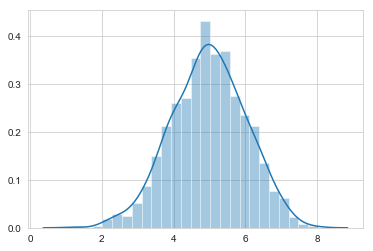

In [9]:
# Normal Distribution
mean, sd = 5, 1
s = np.random.normal(mean, sd, 1000)
ax = sns.distplot(s)

/Users/tomewing/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


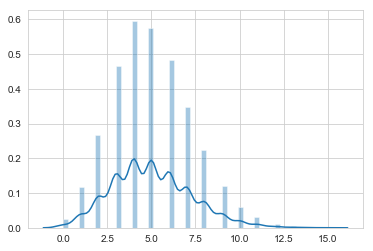

In [10]:
# Poisson Distribution
lam = 5
size = 10000
s = np.random.poisson(lam, size)
ax = sns.distplot(s)

/Users/tomewing/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


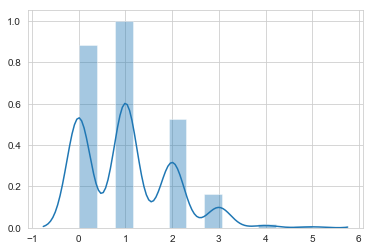

In [11]:
# Binomial Distribution
n = 10.5
p = .1
s = np.random.binomial(n, p, 1000)
ax = sns.distplot(s)

**My approach**

With the basic functionality working outside the function we can start to design what our function will look like. I want the function to have the following structure:

* Master function
    * Parameter validation sub-function
    * Generate normal distribution sub-function
    * Generate poisson distribution sub-function
    * Generate binomial distribution sub-function
    
These finished functions are shown below.

In [12]:
def validate_params(size, dist, mean, sd, lam, trials, prob):
    '''
    Sub function for the distribution_sampler function to validate the user input parameters.
    If the parameters are incorrect, a TypeError is raised to alert the user to change the
    input parameters
    '''
    
    # Mandatory parameter error handling
    
    if dist not in ['Normal', 'Poisson', 'Binomial']:
        raise ValueError("The dist parameter is mandatory and must equal 'Normal', 'Poisson', or 'Binomial'")
        
    if not isinstance(size, int):
        raise ValueError('The size parameter is mandatory and must be an integer.')
        

    # Distribution specific error handling and warnings
    
    if dist == 'Normal':
        # Raise an error if the mean or sd parameters aren't set
        if (mean == None) or (sd == None):
            raise NameError("The mean and sd parameters must be set where dist == 'Normal'")
            
        # Raise a warning if irrelevent parameters are provided
        elif (lam != None) or (trials != None) or (prob != None):
            warnings.warn(
                'The lam, trials and prob parameters are not used in the selection of a normal '
                'distribution. These parameters will be ignored.'
            )
            
    if dist == 'Poisson':
        # Raise an error if the lam parameter isn't set
        if lam == None:
            raise NameError("The lam parameter must be set where dist == 'Poisson'")
        
        # Raise a warning if irrelevent parameters are provided
        elif (mean != None) or (sd != None) or (trials != None) or (prob != None):
            warnings.warn(
                'The mean, sd, trials and prob parameters are not used in the selection of a ' 
                'poisson distribution. These parameters will be ignored.'
            )
            
            
    if dist == 'Binomial':
        # Raise an error if the trials or prob parameters aren't set
        if (trials == None) or (prob == None):
            raise NameError("The trials and prob parameters must be set where dist == 'Binomial'")
            
        # Raise a warning if irrelevent parameters are provided
        elif (mean != None) or (sd != None) or (lam != None):
            warnings.warn(
                'The mean, sd and lam parameters are not used in the selection of a binomial ' 
                'distribution. These parameters will be ignored.'
            )            


In [13]:
def generate_normal(size, mean, sd):
    '''
    Sub function for the distribution_sampler function. Generates samples from a normal 
    distribution based upon the size, mean and sd parameters.
     
    Returns the generated sample as s.
    '''
    s = np.random.normal(mean, sd, size)
    return s

In [14]:
def generate_poisson(size, lam):
    '''
    Sub function for the distribution_sampler function. Generates samples from a poisson 
    distribution based upon the size and lam parameters.
    
    Returns the generated sample as s.
    '''
    s = np.random.poisson(lam, size)
    return s

In [15]:
def generate_binomial(size, trials, prob):
    '''
    Sub function for the distribution_sampler function. Generates samples from a binomial 
    distribution based upon the size, trials and prob parameters.
    
    Returns the generated sample as s.
    '''
    s = np.random.binomial(trials, prob, size)
    return s

In [16]:
def distribution_sampler(size, dist, mean=None, sd=None, lam=None, trials=None, prob=None):
    
    '''
    
    Selects a random sample from a given distribution, based upon the input parameters,
    and returns a numpy array object.
    
    Parameters
    ----------
    size : integer
    
    The number of samples to be selected from the distribution.
    
    distribution : string
    
    The type of distribution to be created. Applicable values are 'Normal', 
    'Poisson' or 'Binomial'.
    
    mean : float / int , optional
    
    Applicable to Normal distributions only. The mean value will dictate the 
    centre of the distribution.
    
    sd: float / int , optional
    
    Applicable to Normal distributions only. The sd (Standard Deviation) will
    dictate the spread or width of the distribution.
    
    lam : float / int , optional
    
    Applicable to Poisson distributions only. The lam (lambda) controls the mean 
    and variance of the sample.
    
    trials: float / int , optional
    
    Applicable to Binomial distributions only. The trials parameter is used to 
    dictate the number of trials to run in generating the sample
    
    prob: float / int , optional
    
    Applicable to Binomial distributions only. The prob parameter is used to dicitate
    the probability of a trial being successful.
    

    Returns
    -------

    s : A numpy array of samples based upon the input parameters.
    
    Notes
    -----

    The samples are generated using the numpy library, v1.15. For more details,
    check the API Reference material here: https://docs.scipy.org/doc/numpy-1.15.1/reference/

    Examples
    --------
    s = distribution_sampler(1000, 'Normal', mean=0, sd = 5)
    s = distribution_sampler(1000, 'Poisson', lam=5)
    s = distribution_sampler(1000, 'Binomial', trials=5, prob=0.5)    
    '''
    
    # Validate the parameters
    validate_params(size, dist, mean, sd, lam, trials, prob)
     
    # Generate the appropriate distribution sample
    if dist == 'Normal':
        s = generate_normal(size, mean, sd)
        
    elif dist == 'Poisson':
        s = generate_poisson(size, lam)
        
    elif dist == 'Binomial':
        s = generate_binomial(size, trials, prob)
    
    return s

We can now test this with some function calls:

/Users/tomewing/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


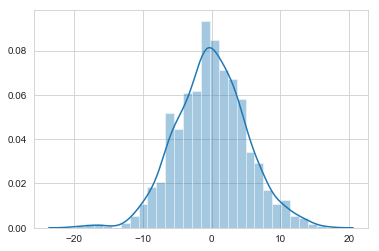

In [17]:
# Normal Sample
s = distribution_sampler(1000, 'Normal', mean=0, sd = 5)
ax = sns.distplot(s)

As this is a notebook, I'm not really able to show the process of how I've accomplished this particularly well since what you see is the finished product! However my rough workflow was as follows:

* Created the master function (`distribution_sampler`) first and set the input parameters.
* Wrote the first tranche of code to validate the parameters (this was the distribution specific error handling) in the `distribution_sampler` function.
* Created the `validate params` sub-function and refactored the first tranche of code into it.
* Create the `generate_normal`, `generate poisson` and `generate_binomial` sub-functions and set the `distribution_sampler` function to call these based upon the `dist` parameter.
* Created the mandatory parameter error handling for the `size` and `dist` parameters.
* Added warnings if irrelevent parameters were passed to the function.
* Restarted the Kernel and tested everything with various parameters.
* Wrote the final docstring for the `distribution_sampler` function.

/Users/tomewing/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


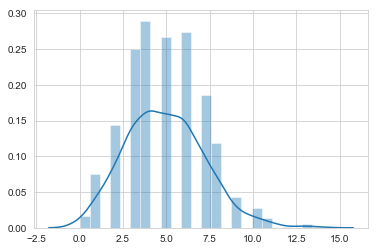

In [18]:
# Poisson Sample
s = distribution_sampler(1000, 'Poisson', lam=5)
ax = sns.distplot(s)

/Users/tomewing/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


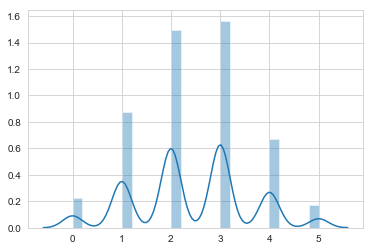

In [19]:
# Binomial Sample
s = distribution_sampler(1000, 'Binomial', trials=5, prob=0.5)
ax = sns.distplot(s)

In [20]:
# Error Handling 1
s = distribution_sampler(1000, 'Normal', lam=5)

NameError: The mean and sd parameters must be set where dist == 'Normal'

In [21]:
# Error Handling 2
s = distribution_sampler(1000.5, 'Normal', mean=0, sd=1)

ValueError: The size parameter is mandatory and must be an integer.

In [22]:
# Warnings
s = distribution_sampler(1000, 'Normal', mean=0, sd=5, lam=5)

/Users/tomewing/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: The lam, trials and prob parameters are not used in the selection of a normal distribution. These parameters will be ignored.


In [23]:
s = distribution_sampler(1000, 'Blah', mean=0, sd=5, lam=5)

ValueError: The dist parameter is mandatory and must equal 'Normal', 'Poisson', or 'Binomial'

And finally test the docstring:

In [24]:
help(distribution_sampler)

Help on function distribution_sampler in module __main__:

distribution_sampler(size, dist, mean=None, sd=None, lam=None, trials=None, prob=None)
    Selects a random sample from a given distribution, based upon the input parameters,
    and returns a numpy array object.
    
    Parameters
    ----------
    size : integer
    
    The number of samples to be selected from the distribution.
    
    distribution : string
    
    The type of distribution to be created. Applicable values are 'Normal', 
    'Poisson' or 'Binomial'.
    
    mean : float / int , optional
    
    Applicable to Normal distributions only. The mean value will dictate the 
    centre of the distribution.
    
    sd: float / int , optional
    
    Applicable to Normal distributions only. The sd (Standard Deviation) will
    dictate the spread or width of the distribution.
    
    lam : float / int , optional
    
    Applicable to Poisson distributions only. The lam (lambda) controls the mean 
    and vari

**Notes & Caveats**  

Note that the sub functions don't have as detailed docstrings as the `distribution_sampler` function. This is because they will not be of that much interest to users, most of whom will only be interested in the main function. Additionally, much of the information within these would have only been been repeated from the main `distribution_sampler` function anyway.

Additionally in the docstring I've tried to use plain English as much as possible, since the users of the function may not necessarily be people with a head for statistics!

Lastly, this code is likely not fully PEP8 compliant (particularly around line length) as this isn't fully relevent for notebook users.